In [ ]:
from copy import deepcopy
from glob import glob
from utils import read_yaml, read_json, write_yaml

foo = read_yaml("./train.yaml")

for capacity in [2, 4, 8, 16, 32, 64]:
    for pretrain_semantic in [True, False]:
        for seed in [0, 1, 2, 3, 4]:
            foo = deepcopy(foo)
            foo["pretrain_semantic"] = pretrain_semantic
            foo["capacity"] = {
                "episodic": capacity // 2,
                "semantic": capacity // 2,
                "short": 1,
            }
            foo["seed"] = seed
            write_yaml(foo, f"{capacity}_{pretrain_semantic}_{seed}.yaml")

In [ ]:
from glob import glob
import os
import numpy as np
from utils import read_yaml, read_json

results_ = []
for path in glob("./lightning_logs/*/test_debug-*"):
    dir_name_old = "/".join(path.split("/")[:-1])
    hparams_path = os.path.join(dir_name_old, "hparams.yaml")
    hparams = read_yaml(hparams_path)
    des_size = hparams["des_size"]
    capacity = hparams["capacity"]
    capacity = capacity["episodic"] + capacity["semantic"]
    pretrain_semantic = hparams["pretrain_semantic"]
    gpus = hparams["gpus"]
    seed = hparams["seed"]

    test_mean = float(path.split("test_debug-mean=")[-1].split("-std")[0])
    results_.append((des_size, capacity, pretrain_semantic, seed, test_mean))

results = {}
for capacity in [2, 4, 8, 16, 32, 64]:
    for pretrain_semantic in [False, True]:
        results[f"capacity={capacity}_pretrain_semantic={pretrain_semantic}"] = round(
            np.mean(
                [
                    foo[-1]
                    for foo in results_
                    if foo[1] == capacity and foo[2] == pretrain_semantic
                ]
            ),
            3,
        ).item(), round(
            np.std(
                [
                    foo[-1]
                    for foo in results_
                    if foo[1] == capacity and foo[2] == pretrain_semantic
                ]
            ).item(),
            3,
        )
results

In [ ]:
import logging

logger = logging.getLogger()
logger.disabled = True

from room_env.utils import print_handcrafted

print_handcrafted(
    env="RoomEnv-v2",
    des_size="l",
    seeds=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    question_prob=0.1,
    policies={
        "memory_management": "rl",
        "question_answer": "episodic_semantic",
        "encoding": "argmax",
    },
    capacities=[2, 4, 8, 16, 32, 64],
)

In [ ]:
from glob import glob
import os
from utils import read_yaml

# des_size=l-capacity=2-pretrain=True-gpus=0-seed=0

for path in glob("./lightning_logs/version*/test_debug-*"):
    dir_name_old = "/".join(path.split("/")[:-1])
    hparams_path = os.path.join(dir_name_old, "hparams.yaml")
    hparams = read_yaml(hparams_path)
    des_size = hparams["des_size"]
    capacity = hparams["capacity"]
    capacity = capacity["episodic"] + capacity["semantic"]
    pretrain_semantic = hparams["pretrain_semantic"]
    gpus = hparams["gpus"]
    seed = hparams["seed"]
    dir_name_new = f"des_size={des_size}-capacity={capacity}-pretrain={pretrain_semantic}-gpus={gpus}-seed={seed}"
    print(dir_name_old, dir_name_new)
    os.rename(dir_name_old, dir_name_new)

In [ ]:
import gym
import room_env

capacity = 32
env = gym.make(
    "RoomEnv-v2",
    des_size="l",
    seed=0,
    policies={
        "memory_management": "rl",
        "question_answer": "episodic_semantic",
        "encoding": "argmax",
    },
    capacity={"episodic": capacity // 2, "semantic": capacity // 2},
    question_prob=0.1,
    observation_params="perfect",
    allow_random_human=True,
    allow_random_question=True,
    pretrain_semantic=False,
    check_resources=False,
)
state, info = env.reset()

# Plotting


## Average sum of rewards per episode, validation (5 random runs)


/home/tk/.virtualenvs/dev-python3.8/lib/python3.8/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: /home/tk/.virtualenvs/dev-python3.8/lib/python3.8/site-packages/torchvision/image.so: undefined symbol: _ZNK3c1010TensorImpl36is_contiguous_nondefault_policy_implENS_12MemoryFormatE
  warn(f"Failed to load image Python extension: {e}")


val_total_reward_mean pretrain=False [ 77.18000031  72.91999893  79.40000076  77.83999939  88.29999847
  87.81999969  99.25999908  97.96000061 104.68000031  96.47999878
 104.         102.5        100.32000122  99.71999969  95.61999969
 109.31999817] [13.37167192 17.49027045 17.70050732 15.28955128 17.00152966 15.15063146
  5.96610483 20.23033326  7.98132911 15.30129516 10.35663966  1.76068073
  9.33260887 11.70288708  4.93534203  3.90865623] [ 127  255  383  511  639  767  895 1023 1151 1279 1407 1535 1663 1791
 1919 2047]
val_total_reward_mean pretrain=False means: [ 98.90000153 101.11999969 100.63999939 104.67999878 108.78000183
 111.74000092 110.48000031 112.65999908 111.88000183 112.40000153
 114.85999908 108.71999969 113.24000092 115.07999878 113.1
 114.26000061]


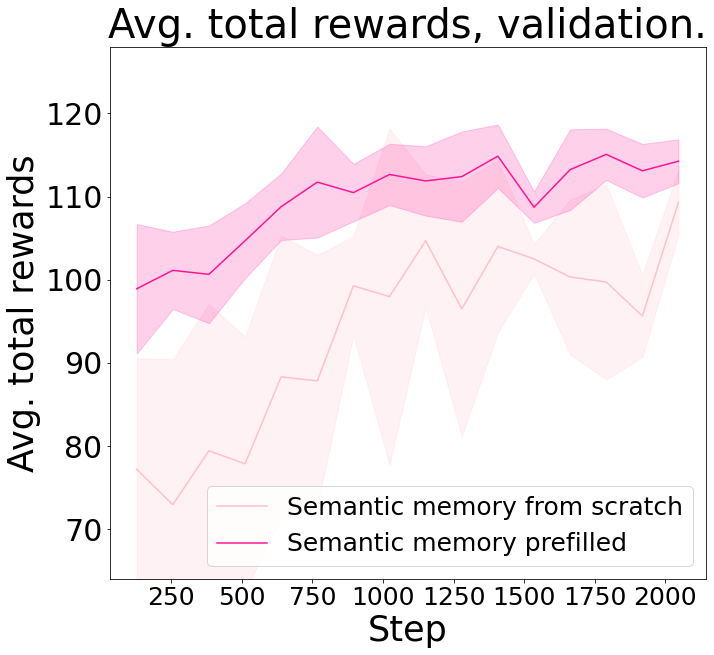

In [2]:
from plotting import plot_training_validation_results

plot_training_validation_results(
    data_dir="./data/",
    kind="val_total_reward_mean",
    capacity=32,
    save_dir="./figures/",
    ymin=64,
    ymax=128,
    ylog=False,
    xlabel="Step",
    figsize=(10, 10),
    legend_loc="lower right",
)

## Average training loss (5 random runs)


In [ ]:
plot_training_validation_results(
    data_dir="./data/",
    kind="train_loss",
    capacity=32,
    save_dir="./figures/",
    ymin=None,
    ymax=None,
    ylog=True,
    xlabel="Step",
    figsize=(10, 10),
    legend_loc="upper right",
)

## Average sum of rewards per episode, test (5 random runs), capacity=32


In [3]:
from plotting import plot_test_results

plot_test_results()

/home/tk/.virtualenvs/dev-python3.8/lib/python3.8/site-packages/gym/envs/registration.py:555: UserWarning: WARN: The environment RoomEnv-v1 is out of date. You should consider upgrading to version `v2`.
  logger.warn(


NameError: name 'HandcraftedAgent' is not defined

## Average sum of rewards per episode, test (5 random runs), capacity=32, all sizes


In [4]:
from plotting import plot_test_results_all_capacities
import matplotlib.pyplot as plt

plot_test_results_all_capacities()

/home/tk/.virtualenvs/dev-python3.8/lib/python3.8/site-packages/gym/envs/registration.py:555: UserWarning: WARN: The environment RoomEnv-v1 is out of date. You should consider upgrading to version `v2`.
  logger.warn(


NameError: name 'HandcraftedAgent' is not defined

## Load the q values


In [5]:
from utils import read_json

test_debug_scratch_path = "./models/des_size=l-capacity=32-pretrain=False-gpus=0-seed=1/test_debug-mean=115.0-std=3.225.json"

test_debug_scratch = read_json(test_debug_scratch_path)["0"]

test_debug_pretrained_path = "./models/des_size=l-capacity=32-pretrain=True-gpus=0-seed=2/test_debug-mean=117.5-std=2.54.json"
test_debug_pretrained = read_json(test_debug_pretrained_path)["0"]

for step in [86]:
    print(f"STEP: {step}")
    print()
    print(f"SCRATCH: {test_debug_scratch[step]}")
    print()
    print(f"PRETRAINED: {test_debug_pretrained[step]}")
    print()
    print(
        "----------------------------------------------------------------------------"
    )

STEP: 86

SCRATCH: {'state': ["[{'human': 'Gloria', 'object': 'sheep', 'object_location': 'lap', 'timestamp': 23}, {'human': 'James', 'object': 'bicycle', 'object_location': 'nursery', 'timestamp': 28}, {'human': 'Jean', 'object': 'sandwich', 'object_location': 'lunchbox', 'timestamp': 29}, {'human': 'Jose', 'object': 'dog', 'object_location': 'kennel', 'timestamp': 33}, {'human': 'Judith', 'object': 'bird', 'object_location': 'kitchen', 'timestamp': 34}, {'human': 'Keith', 'object': 'sheep', 'object_location': 'cupboard', 'timestamp': 38}, {'human': 'Lauren', 'object': 'bird', 'object_location': 'countryside', 'timestamp': 41}, {'human': 'Lisa', 'object': 'car', 'object_location': 'lunchbox', 'timestamp': 43}, {'human': 'Matthew', 'object': 'car', 'object_location': 'apartment', 'timestamp': 47}, {'human': 'Roger', 'object': 'train', 'object_location': 'farm', 'timestamp': 57}, {'human': 'Alexander', 'object': 'keyboard', 'object_location': 'desk', 'timestamp': 64}, {'human': 'Anthony

## Load the trained models and visualize the t-SNE-reduced embeddings.


In [6]:
from plotting import UnderstandModel

um = UnderstandModel()

um.compute_reduction(
    tsne_params={
        "n_components": 2,
        "perplexity": 5,
        "init": "pca",
        "learning_rate": "auto",
    }
)

print(
    len(um.indices["humans"]),
    len(um.indices["objects"]),
    len(um.indices["object_locations"]),
)

for semantic in ["scratch", "pretrained"]:
    for interest in ["humans", "objects", "object_locations"]:
        um.plot_embeddings(semantic=semantic, interest=interest)

2022-09-27 18:16:30.888 INFO instantiator - <module>: Created a temporary directory at /tmp/tmpyakyeask
2022-09-27 18:16:30.890 INFO instantiator - _write: Writing /tmp/tmpyakyeask/_remote_module_non_scriptable.py
/home/tk/.virtualenvs/dev-python3.8/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/tk/.virtualenvs/dev-python3.8/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(


NotImplementedError: 